In [28]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import pickle 


In [29]:
labelsPath = "/home/harshita/coco.names"
labels = open(labelsPath).read().strip().split("\n")
weightsPath = "/home/harshita/yolov3.weights"
configPath = "/home/harshita/yolov3.cfg"


YOLO = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = YOLO.getLayerNames()
ln = [ln[i[0] - 1] for i in YOLO.getUnconnectedOutLayers()]

In [44]:
ctr = 0

VOC = {}
for i in labels:
    if(i == 'bottle'):
        VOC[i]=(20,30);
    elif(i == 'chair'): 
        VOC[i]=(35,45);
    elif(i == 'sofa'): 
        VOC[i]=(50,55);
    elif(i == 'diningtable'): 
        VOC[i]=(50,75);
    elif(i == 'bed'): 
        VOC[i]=(65,90);
    else:
        VOC[i]=(0);
 


In [45]:
with open ('/home/harshita/ann_labels.bin','wb') as file:
    pickle.dump(VOC,file)

In [46]:
with open('/home/harshita/ann_labels.bin','rb') as file:
    data = pickle.load(file)

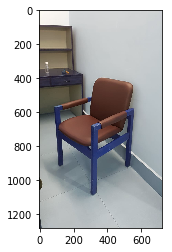

In [48]:
path = '/home/harshita/furni.jpeg'
image = cv2.imread(path)
plt.imshow(image)

sofa 53


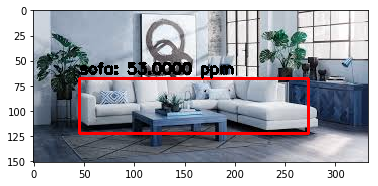

In [70]:
path = '/home/harshita/f2.jpeg'
image = cv2.imread(path)

blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB = True, crop = False)
YOLO.setInput(blob) 
layerOutputs = YOLO.forward(ln)
(h, w) = image.shape[:2]
boxes=[]
confidences=[]
classIDs=[]
for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.6 and (labels[classID]== 'bottle' or labels[classID]== 'chair' or labels[classID]== 'sofa' or labels[classID]== 'diningtable' or labels[classID]== 'bed'):
                #num += 1
                box = detection[0:4]*np.array([w,h,w,h])
                (cX, cY, width, height) = box.astype("int")
                x = int(cX - (width/2))
                y = int(cY - (height/2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
if len(idxs) > 0:
    for i in idxs.flatten():
        if confidences[i] > 0.4 :
                (x,y) = (boxes[i][0], boxes[i][1])
                (w,h) = (boxes[i][2], boxes[i][3])
                cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
                key = labels[classIDs[i]]
                l = random.randint(VOC[key][0],VOC[key][1])
                text = "{}: {:.4f} ppm".format(labels[classIDs[i]],l)
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 2)
                print(labels[classIDs[i]],l)
                

                
                
plt.imshow(image)                
                

In [71]:
confidences 

[0.9479908347129822]

In [56]:
boxes 

[[8, 360, 170, 245],
 [73, 333, 404, 273],
 [391, 391, 216, 279],
 [-1, 359, 146, 243]]

In [25]:
print(classIDs)

[56, 60, 56, 56]


In [26]:
for i in classIDs:
    print(labels[i])

chair
diningtable
chair
chair
